In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Уменьшение размерности

## Проклятие размероности (curse of dimentionality)

Часто датасеты состоят из оченьб большого количества признаков - тысячи.
Это затрудняет поиск моделей.
Можно сильно уменьшить размерность без больших потерь информации, т.е. сократить объем входных данных,
упростить расчет модели.

Пространство варианттов разтет экспотенциально:
Рассмотрим отрезок длины 10
                        
$$10^1 = 10$$
$$10^2 = 100$$
$$10^3 = 1000$$
...

Экспоненциальный рост

Среднее расстояние между точками гиперкуба.

In [3]:
from scipy.spatial import distance

def avg_dist(n_dimensions):
    dist = 0
    n_points = 100000
    for i in range(n_points):
        p1 = np.random.rand(n_dimensions)
        p2 = np.random.rand(n_dimensions)
        dist += distance.euclidean(p1, p2)
    return dist / n_points

In [4]:
avg_dist(1)

0.33416322767980716

In [5]:
avg_dist(2)

0.5218622833575598

In [6]:
avg_dist(3)

0.6625201651316961

In [7]:
avg_dist(10)

1.2675180402721244

In [8]:
avg_dist(100)

4.075430818686353

In [9]:
avg_dist(1000)

12.90783311585692

In [10]:
avg_dist(10000)

40.82319304446519

Новая точка будет далеко от других, это означает, что построенная модель скорее всего не учитывает новые данные,
тоесть модель недообучена или переобучена.

# PCA - Principal Component Analysis

Алгоритм:

1. Стандартизируем данные (если не в одном масштабе)
2. Считаем матрицу корреляций или ковариаций по нашим данным
3. Получаем собственные вектора и собственные значения по матрице корреляций/ковариаций (или используем SVD)
4. Сортируем собственные значения по убыванию (чем выше собственное значение - тем выше дисперсия, которую объясняет соответствующая компонента). 
5. По вкусу - выбираем $k$ собственных значений, где $k < d$ (изначальной размерности данных), чтобы сократить размерность
6. Берем соответствующие собственные вектора (отсортированные в том же порядке, что и собственные числа) и составляем из них матрицу проекции $W$
7. Умножаем исходные данные $X$ на $W$ и получаем матрицу главных компонент.

# Explaned Variance (Объяснённая дисперсия)

In [11]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = StandardScaler()

X_iris_scaled = scaler.fit_transform(X_iris)

pca = PCA()
pca.fit(X_iris_scaled)

PCA()

In [12]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

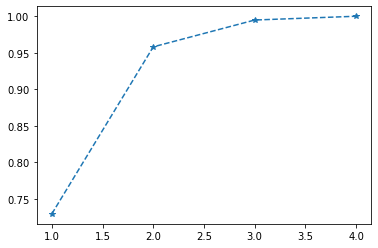

In [14]:
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_), '*--');

In [15]:
x_new = PCA(n_components=2).fit_transform(X_iris_scaled)
x_new.shape

(150, 2)

In [16]:
x_new

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

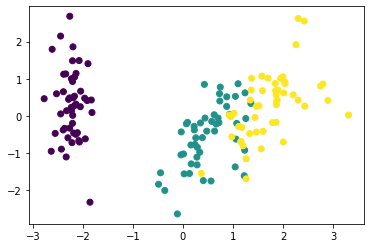

In [17]:
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_iris);

# Данные посложнее

In [18]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [19]:
X.shape, y.shape

((70000, 784), (70000,))

In [20]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

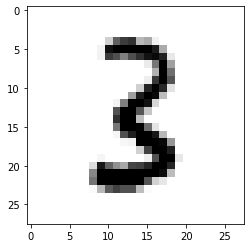

In [21]:
plt.imshow(X.iloc[50000].values.reshape(28, 28), cmap=plt.cm.gray_r);

In [22]:
pca = PCA()
pca.fit(scaler.fit_transform(X))
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= .95) + 1
d

332

In [23]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

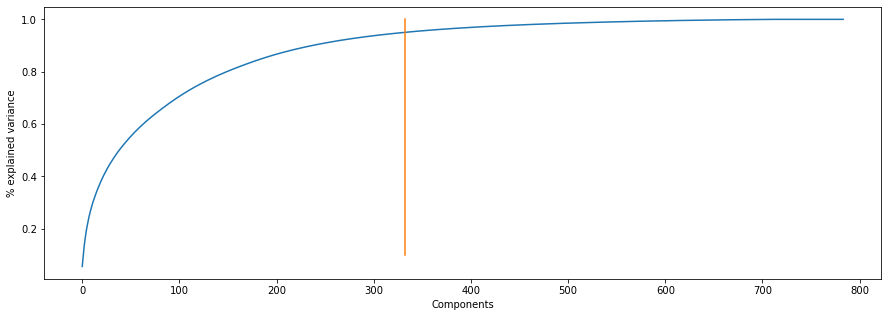

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(cumsum)
plt.plot([d, d], [0.1, 1])
plt.xlabel('Components')
plt.ylabel('% explained variance')
plt.show()

# Применение для визуализации

In [25]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [26]:
idx = np.random.randint(X.shape[0], size=10000)
X_sample = X.iloc[idx, :]
y_sample = y[idx]

X_sample.shape, X.shape, y_sample.shape,  y.shape

((10000, 784), (70000, 784), (10000,), (70000,))

In [27]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_sample)

In [28]:
X_reduced.shape

(10000, 2)

<AxesSubplot:>

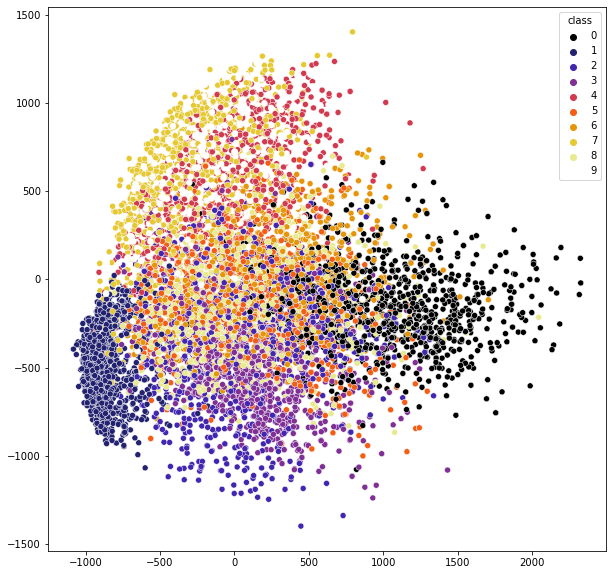

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=y_sample.astype(int),
    palette='CMRmap',
    legend='full'
)

**В связи с тем, что зависимость пикселов в картинка не линейная, PCA плохо полходит для визуализации**

# TSNE
## t-Distributed Stochastic Neighbor Embedding

# Гиперпараметры очень важны

In [30]:
#from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

In [31]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, verbose=1)
tsne_transformed = tsne.fit_transform(X_sample)

<AxesSubplot:>

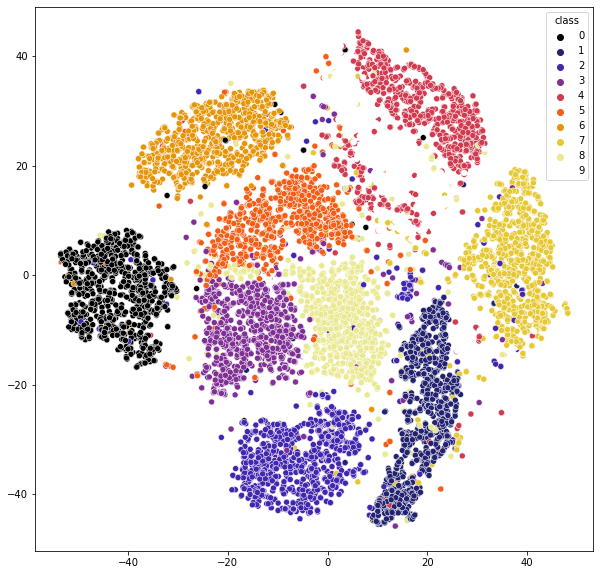

In [32]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1],
    hue=y_sample.astype(int),
    palette='CMRmap',
    legend='full'
)

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)



In [33]:
df = pd.read_csv('datasets/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [34]:
df['diagnosis'] = pd.Categorical(df.diagnosis).codes
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [35]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int8   
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
X = df.drop(['id', 'diagnosis'], axis=1)
X.shape
y = df['diagnosis']
y.shape

(569,)

In [44]:
X_scaled = scaler.fit_transform(X)

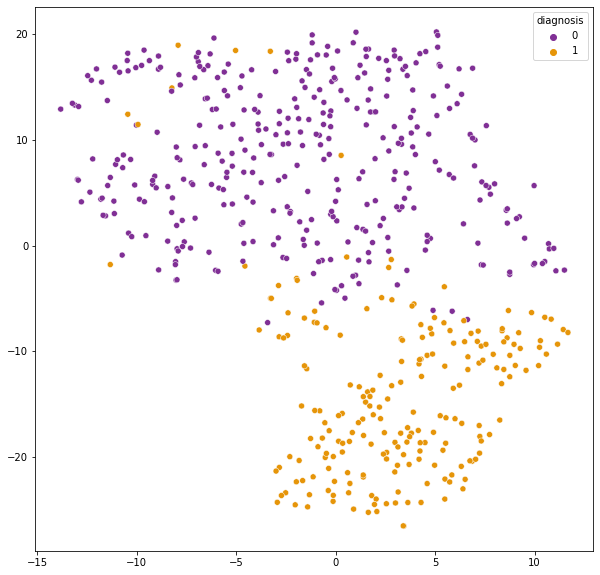

In [45]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, verbose=1)
tsne_transformed = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1],
    hue=y.astype(int),
    palette='CMRmap',
    legend='full'
);

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
lr = LogisticRegressionCV(cv=5)

In [50]:
lr.fit(x_train, y_train)

LogisticRegressionCV(cv=5)

In [51]:
y_pred = lr.predict_proba(x_test)[:, 1]

In [54]:
roc_auc_score(y_test, y_pred)

0.9955106621773289

In [67]:
def analyzePCA(X, pca, explained_treshold=.95):
    """Plot cumulative explaned variance of PCA"""
    pca.fit(X)
    pca_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(15, 7))
    plt.plot(np.cumsum(pca_variance))
    plt.hlines(explained_treshold, 0, len(pca_variance))
    plt.title(f'Number of components to explain {100*explained_treshold, np.argwhere(np.cumsum(pca_variance)>.95)[0]}')
    plt.xlabel('number of components')
    plt.ylabel('cummulative explaned variance')

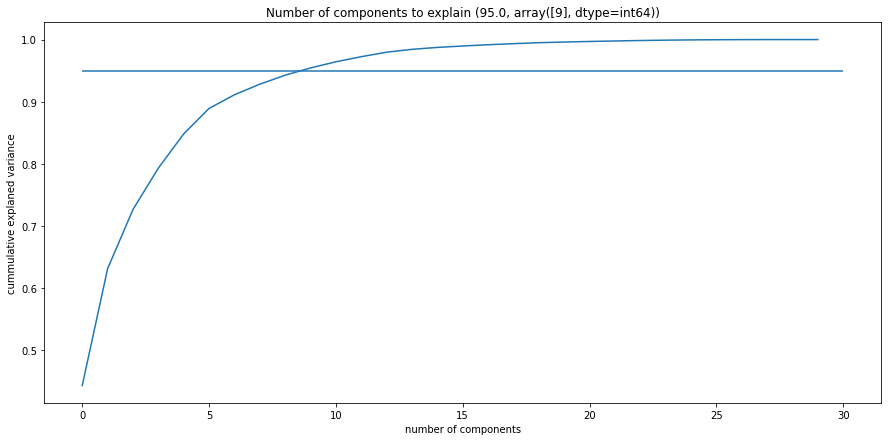

In [68]:
pca = PCA()
analyzePCA(x_train, pca)

In [69]:
pca = PCA(n_components=9)
x_train_pca = pca.fit_transform(x_train)

In [72]:
x_train_pca.shape

(398, 9)

In [71]:
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(pca.transform(x_test))
roc_auc_score(y_test, y_pred)

0.9640151515151516

In [75]:
import pickle # для сохранеения моделей